<a href="https://colab.research.google.com/github/raphaellins/ai-playground/blob/master/deep_dream_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.3.0'

In [2]:
base_model = tf.keras.applications.InceptionV3(include_top=False,
                                               weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [4]:
names = ['mixed3', 'mixed5', 'mixed8', 'mixed9']

In [ ]:
layers = [base_model.get_layer(name).output for name in names]

In [ ]:
deepdream_model = tf.keras.Model(inputs = base_model.input, outputs = layers)

In [9]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/drive/MyDrive/machine_learning_practice/StaryNight.jpg',
                                                     target_size=(225, 375))

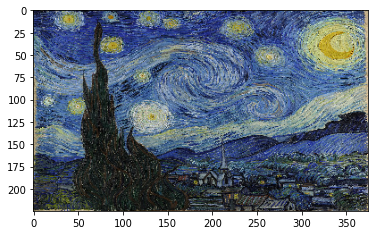

In [11]:
plt.imshow(sample_image)

In [12]:
sample_image = np.array(sample_image) / 255.0
sample_image.shape

(225, 375, 3)

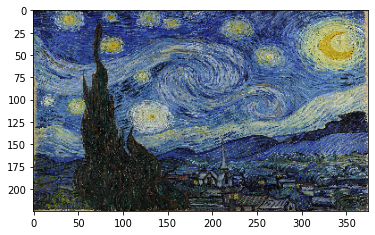

In [13]:
plt.imshow(sample_image)

In [14]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image.shape

(225, 375, 3)

In [15]:
sample_image = tf.Variable(tf.keras.applications.inception_v3.preprocess_input(sample_image))

In [16]:
sample_image = tf.expand_dims(sample_image, axis = 0)


In [17]:
activations = deepdream_model(sample_image)